In [228]:
import pandas as pd

In [229]:
dataset = pd.read_csv('Latency-data-2021-11-17 14_17_58_processed.csv')
dataset

,Time,RTT AVG
0,1,47.527222
1,2,45.916417
2,3,45.418750
3,4,48.833167
4,5,45.554500
...,...,...
716,717,46.620000
717,718,47.916750
718,719,46.488167
719,720,46.102917


In [230]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [231]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [232]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [233]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

483 238


In [234]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [235]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [236]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [238]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
481/481 - 10s - loss: 0.0322 - 10s/epoch - 21ms/step
Epoch 2/100
481/481 - 2s - loss: 0.0087 - 2s/epoch - 3ms/step
Epoch 3/100
481/481 - 1s - loss: 0.0022 - 1s/epoch - 3ms/step
Epoch 4/100
481/481 - 2s - loss: 1.8020e-04 - 2s/epoch - 4ms/step
Epoch 5/100
481/481 - 2s - loss: 1.7832e-05 - 2s/epoch - 3ms/step
Epoch 6/100
481/481 - 2s - loss: 1.4642e-05 - 2s/epoch - 4ms/step
Epoch 7/100
481/481 - 2s - loss: 1.3614e-05 - 2s/epoch - 3ms/step
Epoch 8/100
481/481 - 2s - loss: 1.2590e-05 - 2s/epoch - 4ms/step
Epoch 9/100
481/481 - 2s - loss: 1.2206e-05 - 2s/epoch - 3ms/step
Epoch 10/100
481/481 - 2s - loss: 1.1047e-05 - 2s/epoch - 3ms/step
Epoch 11/100
481/481 - 2s - loss: 1.0600e-05 - 2s/epoch - 4ms/step
Epoch 12/100
481/481 - 2s - loss: 9.9488e-06 - 2s/epoch - 4ms/step
Epoch 13/100
481/481 - 1s - loss: 9.9963e-06 - 1s/epoch - 3ms/step
Epoch 14/100
481/481 - 2s - loss: 9.8115e-06 - 2s/epoch - 4ms/step
Epoch 15/100
481/481 - 2s - loss: 9.5185e-06 - 2s/epoch - 4ms/step
Epoch 16/100


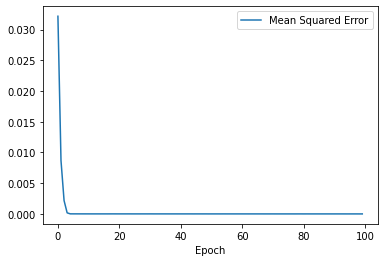

In [239]:
from keras.callbacks import History
plt.figure()
plt.xlabel('Epoch')
plt.plot(history.epoch, np.array(history.history['loss']),label='Mean Squared Error')
plt.legend()
plt.show()